# Workshop pandas 

On va reprendre le dataset des arbres de Paris et l'analyser en profondeur avec [pandas](pandas.pydata.org/pandas-docs/dev/basics.html)

le dataset les-arbres.csv est disponible dans le channel slack ou sur le site [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true)




In [14]:
import pandas as pd

# folder ou sont les datasets
# si le dataset est dans le meme repertoire que le notebook:
DATA_PATH = './'

# sinon en chemin absolu
DATA_PATH = '/home/alexis/py918/data/'
# ou relatif
# DATA_PATH = './../data/'

# nom du fichier 
filename = 'les-arbres.csv'



In [15]:
DATA_PATH + filename

'/home/alexis/py918/data/les-arbres.csv'

In [17]:
''' 
On charge les données dans une dataframe pandas
* les colonnes sont séparées par des ';' et non des ','  il faut preciser: sep
* une des lignes est malformée: 
  on met error_bad_lines a False pour que cette ligne ne soit pas prise en compte
'''

df = pd.read_csv(DATA_PATH + filename, sep=';', error_bad_lines=False)

print("le fichier a {} rangées (arbres) et {} colonnes".format(df.shape[0], df.shape[1]))

print("les colonnes de la dataframes sont:")
print(df.columns)


b'Skipping line 1916: expected 17 fields, saw 18\n'


le fichier a 200332 rangées (arbres) et 17 colonnes
les colonnes de la dataframes sont:
Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d'],
      dtype='object')


# explorer la dataframe

Avec les fonctions suivantes


* df.head(10)
* df.tail()
* df.dtypes
* df.duplicated()
* df.describe()


In [24]:
# La fonction .head( nombre de ligne): l'en-tete de la dataframe

df.head(2)

# La fonction .tail( nombre de ligne): la fin de la dataframe
# df.tail(7)

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,232702.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD DE MENILMONTANT,000602002,Sophora,Sophora,japonica,NaN,55.0,5.0,JA,0.0,"48.8652353853, 2.38481800435"
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146"


In [23]:
# le type de la colonne df.dtypes

df.dtypes


IDBASE                float64
TYPEEMPLACEMENT        object
DOMANIALITE            object
ARRONDISSEMENT         object
COMPLEMENTADRESSE      object
NUMERO                float64
LIEU / ADRESSE         object
IDEMPLACEMENT          object
LIBELLEFRANCAIS        object
GENRE                  object
ESPECE                 object
VARIETEOUCULTIVAR      object
CIRCONFERENCEENCM     float64
HAUTEUR (m)           float64
STADEDEVELOPPEMENT     object
REMARQUABLE           float64
geo_point_2d           object
dtype: object

In [29]:
# rangées en double

doublons = df.duplicated()
doublons

# any all 
print("Y a t il au moins un Vrai dans doublons: {}".format( any(doublons)   )  )

if any(doublons): 
    print("il y a des doublons")
else:
    print("il n'y a aucun doublon")
        
# voir si toute les valeurs de la liste sont a false




Y a t il au moins un Vrai dans doublons: False
il n'y a aucun doublon


In [32]:
# tous les doublons sont a False
all(~doublons)

True

In [71]:
# sur espece, stade de devt et arrondissement
# considere que les data qui ont un numero non  null


# je ne regarde que les rangees qui ont un comnplement d'addresse non null

condition = ~df['COMPLEMENTADRESSE'].isnull()

df_avec_complement_adresse = df[condition].copy()

# sur ce sous ensemble je regarde les arbres qui ont la meme : domanialite, arrdt, ... espece

similaire= df_avec_complement_adresse.duplicated(
        subset = ['DOMANIALITE', 'ARRONDISSEMENT', 'COMPLEMENTADRESSE', 'ESPECE'], 
        keep = False
)

# le nombre d'arbres 1) avec complement d'adresse et 2) similaire sur les champs consideres
print(df[condition & similaire].shape)
# l'en tete 
df[condition & similaire].head(10)


(23170, 17)


,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,NaN,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442"
22,251225.0,Arbre,Alignement,PARIS 15E ARRDT,N°32,NaN,RUE DE VOUILLE,000602003,Tilleul,Tilia,tomentosa,NaN,120.0,12.0,A,0.0,"48.8344213832, 2.30599876394"
26,265449.0,Arbre,Alignement,PARIS 15E ARRDT,N°212,NaN,RUE DE LA CONVENTION,003202015,Tilleul,Tilia,tomentosa,NaN,70.0,8.0,JA,0.0,"48.8367859294, 2.29774187171"
72,251071.0,Arbre,Alignement,PARIS 15E ARRDT,2,NaN,AVENUE DE SUFFREN,000202003,Tilleul,Tilia,tomentosa,NaN,150.0,20.0,A,0.0,"48.8572067827, 2.29131596986"
77,275354.0,Arbre,Alignement,PARIS 7E ARRDT,27,NaN,BOULEVARD DES INVALIDES,000301022,Platane,Platanus,occidentalis,NaN,15.0,15.0,A,0.0,"48.8549240846, 2.315000748"
93,266075.0,Arbre,Alignement,PARIS 15E ARRDT,N°81,NaN,RUE SAINT CHARLES,000901005,Platane,Platanus,x hispanica,NaN,45.0,9.0,JA,0.0,"48.847297374, 2.28622497498"
94,271810.0,Arbre,Alignement,PARIS 7E ARRDT,14,NaN,AVENUE DUQUESNE,000402019,Platane,Platanus,x hispanica,NaN,75.0,8.0,A,0.0,"48.8519372776, 2.30959046852"
111,257857.0,Arbre,Alignement,PARIS 7E ARRDT,215,NaN,BOULEVARD SAINT GERMAIN,004901002,Platane,Platanus,occidentalis,NaN,200.0,20.0,M,0.0,"48.8570149372, 2.32438548389"
112,258427.0,Arbre,Alignement,PARIS 15E ARRDT,2,NaN,RUE DU GENERAL GUILLAUMAT,000202001,Platane,Platanus,x hispanica,NaN,190.0,15.0,A,0.0,"48.8287692194, 2.2937496863"
113,276484.0,Arbre,Alignement,PARIS 7E ARRDT,27,NaN,AVENUE DE BRETEUIL,000303009,Platane,Platanus,orientalis,NaN,150.0,10.0,A,0.0,"48.8497103295, 2.31222669589"


In [84]:
# ordonner la dataframe par remarquable 
# on veut les arbres remarquables en premier

df.sort_values( by = ['REMARQUABLE'], ascending = False, inplace = True  )

print(df['REMARQUABLE'].head())
print(df['REMARQUABLE'].tail())


108872    1.0
171721    1.0
128221    1.0
63848     1.0
59840     1.0
Name: REMARQUABLE, dtype: float64
200293   NaN
200296   NaN
200311   NaN
200312   NaN
200331   NaN
Name: REMARQUABLE, dtype: float64


In [89]:
df.sort_values( by = ['REMARQUABLE', 'CIRCONFERENCEENCM'], ascending = False, inplace = True  )

print(df[['REMARQUABLE', 'CIRCONFERENCEENCM']].head())

df.sort_values( by = ['CIRCONFERENCEENCM', 'REMARQUABLE' ], ascending = False, inplace = True  )

print(df[['REMARQUABLE', 'CIRCONFERENCEENCM']].head())


df.sort_values( by = ['REMARQUABLE', 'CIRCONFERENCEENCM'], ascending = [False, True], inplace = True  )

print(df[['REMARQUABLE', 'CIRCONFERENCEENCM']].head())




        REMARQUABLE  CIRCONFERENCEENCM
8174            1.0             2439.0
197194          1.0              695.0
12708           1.0              686.0
191164          1.0              645.0
94121           1.0              634.0
        REMARQUABLE  CIRCONFERENCEENCM
122366          0.0           250255.0
10790           0.0           120170.0
66755           0.0            79120.0
125697          0.0            65110.0
141125          0.0            30140.0
        REMARQUABLE  CIRCONFERENCEENCM
10461           1.0               30.0
96252           1.0               45.0
137706          1.0               55.0
167263          1.0               78.0
102690          1.0               81.0


In [60]:
# selectionner une colonne : ['REMARQUABLE']
df['REMARQUABLE']

# selectionner plusieurs colonnes : [['REMARQUABLE', 'CIRCONFERENCEENCM']]

df[['REMARQUABLE', 'CIRCONFERENCEENCM']]

(31014, 17)

# modifier le nom des colonnes

* on affiche les colonnes avec 
        df.columns


* on peut modifier le nom des colonnes simplement avec


        df.columns = [liste des noms des nouvelles colonnes]

1. ecrire une fonction *transforme_colonnes* qui prends en entree une liste de strings 
    et qui retourne les elements de cette liste 
    * en minsucule
    * les ' ' remplacés par des '_'
    * les parentheses ( et ) remplacées par des '_'
    * qui remplace 2 '__' consecutifs par un seul '_'

Utiliser pour cela  les fonctions suivantes

        'A'.lower()
et la fonction replace():

        '(abc)'.replace( '(','_' ) )
    
    

2. tester que la fonction fonctionne comme prévu avec assert:
    
        assert transforme_colonnes(['Hauteur (m)']) == 'hauteur__m', "ca marche pas"

3. utiliser la fonction pour creer une nouvelle liste de nom de colonnes

4. renommer les colonnes de df avec la nouvelle liste

In [9]:
df.ARRONDISSEMENT.value_counts()

PARIS 15E ARRDT      17156
PARIS 13E ARRDT      16714
PARIS 16E ARRDT      16405
PARIS 20E ARRDT      15341
PARIS 19E ARRDT      13723
PARIS 12E ARRDT      12602
SEINE-SAINT-DENIS    11574
BOIS DE VINCENNES    11512
PARIS 14E ARRDT      11422
PARIS 17E ARRDT      10764
PARIS 18E ARRDT      10025
PARIS 7E ARRDT        8689
VAL-DE-MARNE          7581
PARIS 8E ARRDT        7247
PARIS 11E ARRDT       5663
HAUTS-DE-SEINE        5299
BOIS DE BOULOGNE      3983
PARIS 10E ARRDT       3386
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2403
PARIS 6E ARRDT        1766
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: ARRONDISSEMENT, dtype: int64

# Arbres geants


On a vu que certains arbres avaient des valeurs abberrantes en hauteur et circonference. On va d'abord retrouver ces valeurs puis supprimer ces echantillons du dataset.

1. avec la fonction describe() appliquée a la colonne 'hauteur_m' et 'circonferenceemcm'

2. en plotant un histogram des valeurs avec

        df.hauteur_m.hist(bins = 100)


3. regarder (describe et hist) maintenant un sous ensemble des donnees 

        condition = df.hauteur_m < 50
        
Q) qu'est ce qu'il y a maintenant dans l'objet *condition* ?

4. regarder les histograms et les stats de df[condition]


5. supprimer les echantillons absurdes (hauteur et circonference) simplement avec

        df = df[condition]

6. combien d'echantillons ont ainsi ete supprimés ?




,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,232702.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD DE MENILMONTANT,000602002,Sophora,Sophora,japonica,NaN,55.0,5.0,JA,0.0,"48.8652353853, 2.38481800435"
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146"
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,NaN,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442"
3,241122.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE SARRETTE,000501003,Tilleul,Tilia,tomentosa,NaN,155.0,12.0,A,0.0,"48.8259993388, 2.32878574525"
4,99927.0,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,00030007,Erable,Acer,platanoides,'Schwedleri',125.0,0.0,NaN,NaN,"48.858836461, 2.26870442691"


# Especes d'arbres

On va regarder maintenant les especes d'arbres avec la fonction value_counts() sur la colonne *libellefrancais*.

1. combien a t on d'especes d'arbres differentes ?

2. combien a t on de domanialité ?

3. rajouter `dropna = False` dans value_counts(). a t on des données manquantes  sur ces 2 colonnes ?

4. maintenant la question est de savoir si les especes d'abres varient en fonction de leur domanialité. En utilisant des conditions (df.domanialite == 'Alignement'), ... regarder si les especes principales varient beaucoup en fonction de la domanialité. 




# Nouvelles colonnes

On a les hauteurs d'arbres en metre et les circonference en cm

1. creer une nouvelle colonne `hauteur_cm`

2. les arrondissements ne sont pas tous dans paris. Creer une nouvelle colonne `dans_paris`  Boolean (True ou False) qui soit True quand l'arrondissement contient la string `PARIS` et False sinon



In [91]:

df['hauteur_cm'] = df['HAUTEUR (m)'] * 100



In [92]:
print(df['HAUTEUR (m)'].describe())
print(df['hauteur_cm'].describe())

count    200332.000000
mean         13.108235
std        1970.258098
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: HAUTEUR (m), dtype: float64
count    2.003320e+05
mean     1.310824e+03
std      1.970258e+05
min      0.000000e+00
25%      5.000000e+02
50%      8.000000e+02
75%      1.200000e+03
max      8.818180e+07
Name: hauteur_cm, dtype: float64


In [102]:
# ça marche pas, la colonne n'est pas créée
df.nouvelle_colonne = 1
print(df.nouvelle_colonne)

# ça, ça marche


df['ma_nouvelle_colonne'] = 1
print(df.ma_nouvelle_colonne.head())



1
10461     1
96252     1
137706    1
167263    1
102690    1
Name: ma_nouvelle_colonne, dtype: int64


2. les arrondissements ne sont pas tous dans paris. Creer une nouvelle colonne `dans_paris`  Boolean (True ou False) qui soit True quand l'arrondissement contient la string `PARIS` et False sinon


In [107]:
# trouver les rangées dont l'arrondissement est dans Paris

df['ARRONDISSEMENT'].value_counts()

# "PARIS" in "PARIS 15E ARRDT" => True


condition =    df['ARRONDISSEMENT'].str.contains("PARIS")

# on a plus seine st denis, bois de vincennes, ....
# print(df[condition]['ARRONDISSEMENT'].value_counts())

# autre facon de regarder les valeurs uniques d'une colonne

print(df[condition]['ARRONDISSEMENT'].unique())


['PARIS 18E ARRDT' 'PARIS 10E ARRDT' 'PARIS 3E ARRDT' 'PARIS 12E ARRDT'
 'PARIS 4E ARRDT' 'PARIS 5E ARRDT' 'PARIS 13E ARRDT' 'PARIS 16E ARRDT'
 'PARIS 20E ARRDT' 'PARIS 7E ARRDT' 'PARIS 1ER ARRDT' 'PARIS 15E ARRDT'
 'PARIS 14E ARRDT' 'PARIS 19E ARRDT' 'PARIS 17E ARRDT' 'PARIS 8E ARRDT'
 'PARIS 11E ARRDT' 'PARIS 6E ARRDT' 'PARIS 9E ARRDT' 'PARIS 2E ARRDT']


In [111]:
# sum d'une liste de boolean donne le nombre de valeurs a True
print("il y a {} arbres dans un arrondissement de Paris".format(sum(condition)))

il y a 160383 arbres dans un arrondissement de Paris


In [113]:
# creer la nouvelle colonne

df['dans_paris'] = condition

df.dans_paris.value_counts()

# df.head()


True     160383
False     39949
Name: dans_paris, dtype: int64

In [120]:
# on a 25k arbres avec une circonference de 0 
# pour lesquels on ne peut pas calculer de raport hauteur / circonference
df[df.CIRCONFERENCEENCM < 1].CIRCONFERENCEENCM.describe()

count    25869.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: CIRCONFERENCEENCM, dtype: float64

In [130]:
df.reset_index(drop = True, inplace = True)
df.head()
df.loc[0]

IDBASE                                       125087
TYPEEMPLACEMENT                               Arbre
DOMANIALITE                                  Jardin
ARRONDISSEMENT                      PARIS 18E ARRDT
COMPLEMENTADRESSE                               NaN
NUMERO                                          NaN
LIEU / ADRESSE                 SQUARE LOUISE MICHEL
IDEMPLACEMENT                              00001160
LIBELLEFRANCAIS                           Grenadier
GENRE                                        Punica
ESPECE                                     granatum
VARIETEOUCULTIVAR                               NaN
CIRCONFERENCEENCM                                30
HAUTEUR (m)                                       3
STADEDEVELOPPEMENT                                A
REMARQUABLE                                       1
geo_point_2d           48.8856292413, 2.34379244341
hauteur_cm                                      300
nouvelle_colonne                                  1
ma_nouvelle_

In [141]:
# ratio entre hauteur et circonference
from tqdm import tqdm


df['rapport'] = 0
for i,d in tqdm(df.iterrows()):
    try: 
        df.loc[i, 'rapport'] = d['hauteur_cm'] / d['CIRCONFERENCEENCM']
    except:
        df.loc[i, 'rapport'] = -1

print(df[df.rapport == -1].shape)

200332it [03:18, 1010.19it/s]

(25869, 19)


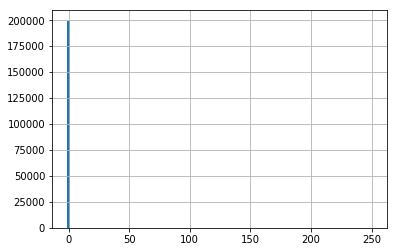

In [140]:
%matplotlib inline
df.rapport.hist(bins = 100)

# on reprend le dataset a partir du debut 


In [136]:
import pandas as pd

DATA_PATH = '/home/alexis/py918/data/'
filename = 'les-arbres.csv'

df = pd.read_csv(DATA_PATH + filename, sep=';', error_bad_lines=False)

df['hauteur_cm'] = df['HAUTEUR (m)'] * 100

df.head()


b'Skipping line 1916: expected 17 fields, saw 18\n'


,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d,hauteur_cm
0,232702.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD DE MENILMONTANT,000602002,Sophora,Sophora,japonica,NaN,55.0,5.0,JA,0.0,"48.8652353853, 2.38481800435",500.0
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146",1000.0
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,NaN,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442",1000.0
3,241122.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE SARRETTE,000501003,Tilleul,Tilia,tomentosa,NaN,155.0,12.0,A,0.0,"48.8259993388, 2.32878574525",1200.0
4,99927.0,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,00030007,Erable,Acer,platanoides,'Schwedleri',125.0,0.0,NaN,NaN,"48.858836461, 2.26870442691",0.0


# hauteur vs circonference


1. En utilisant matplotlib: regarder la variation de la hauteur en fonction de la circonference


    plt.scatterplot(df.circonference, df.hauteur_m)

2. en utilisant la variable dans paris, comparez la hauteur / circonference des arbres dans paris et en banlieue.

par exemple
        

        plt.plot(df[df.dans_paris].circonference, df[df.dans_paris].hauteur_m)

suivi de         

        plt.plot(df[~df.dans_paris].circonference, df[~df.dans_paris].hauteur_m)



# sauver le dataset

1. En utilisant la fonction df.to_csv(), sauver un sous ensemble du dataset composé des arbres dans paris et dont la hauteur / circonference est non absurde.

2. `import csv` puis utiliser le parametre quoting = csv.QUOTE_ALL pour etre sur que tous les elements du fichier csv seront entre double quote.



